In [81]:
import numpy as np
import pandas as pd
import uproot as up 
import os
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.path import Path
from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

print(os.getcwd())
%load_ext autoreload
%autoreload 2

import my_functions_in_coi as fct

/Users/antoinevezon/Desktop/bruit_de_fond/Analyse
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
on_lab_desktop = False
on_my_laptop = not on_lab_desktop

#saving fig path
if on_lab_desktop == True:
    save_dir_path = "/home/vezon/bruit_de_fond"
if on_my_laptop == True:
    save_dir_path = "/Users/antoinevezon/Desktop/"


### LECTURE DU DATATREE ###                                                                            |Corresponding names manually created with mon_group2tree_v3       

rootfile_name_a = "Test_GADGET_GorG2orG4orG24_0001.root"         # 500mbar                             |GorG2orG4orG24.root" 500 mbar
rootfile_name_b = "Test_GADGET_GorG2orG4orG24_V2_0001.root"      # 500mbar                             |GorG2orG4orG24_V2.root" 500 mbar
rootfile_name_c = "Test_GADGET_1bar_GorG2orG4orG24.root"         #                                     |1bar_GorG2orG4orG24.root
rootfile_name_d = "Test_GADGET_1.5bar_GorG2orG4orG24_0001.root"  #                                     |1.5bar_GorG2orG4orG24.root

rootfile_name_e = "New_plastics_2000V_atleast_GADGET_withblackcover_500mbar_0001.root"  # \            |New_plastics_atleastGAD_500mbar.root
rootfile_name_f = "New_plastics_2500V_atleast_GADGET_withblackcover_1000mbar_0001.root" #  |           |New_plastics_atleastGAD_1000mbar.root
rootfile_name_g = "New_plastics_2500V_atleast_GADGET_withblackcover_ascension_0001.root"# /¦ 1500mbar  |New_plastics_atleastGAD_1500mbar.root
rootfile_name_h = "New_plastics_2000V_atleastGAD_Empty_0001.root"#                         ¦           |New_plastics_atleastGAD_Empty.root 
rootfile_name_i = "New_plastics_atleastGAD_Empty_V2_0001.root"   #                         ¦           |New_plastics_atleastGAD_Empty_V2.root
#                                                                                          v  
#                                                            QDC_2 & QDC_4 = resp. Right & Left_pastic ! 
#                                                            Donc il faut les échanger pour etre identique aux Empty                                    
##################################
rootfile_use = rootfile_name_h
##################################

if on_lab_desktop == True:
    path_to_DataTree = f"/home/vezon/bruit_de_fond/data/root/faster2root/{rootfile_use}:DataTree;1"
if on_my_laptop == True:
    path_to_DataTree = f"/Users/antoinevezon/Desktop/bruit_de_fond/data/root/faster2root/{rootfile_use}:DataTree;1"



DataTree = up.open(path_to_DataTree)

DataTree.show()

Keys = DataTree.keys()

print(f"Keys = {Keys}/n")

df = DataTree.arrays(Keys, library="pd")

#df = df.query("sub_Q != -999999") # On ne récupére que les QT2T

print(df.iloc[:,:12].head(20))

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
group_data_nb        | int64_t                  | AsDtype('>i8')
group_size           | int32_t                  | AsDtype('>i4')
group_time           | int64_t                  | AsDtype('>i8')
sub_num              | int32_t                  | AsDtype('>i4')
sub_time             | double                   | AsDtype('>f8')
sub_type             | char*                    | AsStrings()
sub_channel          | int32_t                  | AsDtype('>i4')
sub_Q                | int32_t                  | AsDtype('>i4')
sub_width            | int32_t                  | AsDtype('>i4')
sub_max_amp          | int32_t                  | AsDtype('>i4')
sub_max_pos          | int32_t                  | AsDtype('>i4')
sub_baseline         | int32_t                  | AsDtype('>i4')
sub_sat              | bool                     | AsDtype('bo

On a des valeurs de sub_time qui sont problématique

In [83]:
df_extrem_sub_time = df.query("sub_time > 1000")

On cherche à obtenir la distribution temporelle de la charge des PM GADGET au sein des groupes de coincidences.
Donc les evenements de type QDC ne nous interessent pas. Si on se contente de les retirer du df globale on va avoir des groupes de coincidences où sub_num va sauter une valeur à la ligne qui contenait l'evenement de type QDC.

# On garde les QT2T qui n'appartiennent pas à un groupe de coi présentant un QDC et qui présentent un sub_time cohérent

In [84]:
group_data_nb_QDC = df.query("sub_type == 'QDC_X1' or sub_type == 'QDC_X2'")["group_data_nb"].tolist()
group_data_nb_nQT2T = df.query("sub_type != 'QT2T'")["group_data_nb"].tolist()

if group_data_nb_QDC == group_data_nb_nQT2T:
    print("same")
    
data_no_QDC_group = df.query("group_data_nb not in @group_data_nb_QDC and sub_time < 1000")["sub_time"]

print(data_no_QDC_group)

same
10         0.0
11        32.0
12        50.0
13         0.0
14        30.0
          ... 
966270     4.0
966271     6.0
966272    38.0
966273    76.0
966274    98.0
Name: sub_time, Length: 736098, dtype: float64


# On garde TOUT les QT2T avec sub_time cohérent.

In [85]:
data_no_QDC = df.query("sub_type == 'QT2T' & sub_time < 1000")["sub_time"]
print(data_no_QDC)

0          0.0
1          2.0
2          4.0
3         34.0
4         42.0
          ... 
966270     4.0
966271     6.0
966272    38.0
966273    76.0
966274    98.0
Name: sub_time, Length: 905176, dtype: float64


In [86]:
data = df.query("sub_time < 1000")["sub_time"]


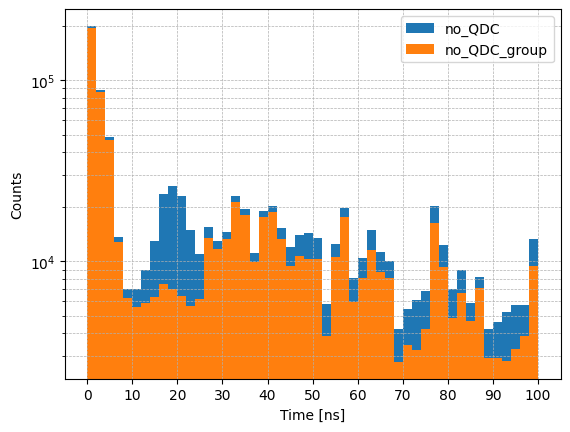

In [87]:
data = df.query("sub_time < 1000")["sub_time"]

fct.hist_sub_time(data_list=[data_no_QDC, data_no_QDC_group],label_list=["no_QDC","no_QDC_group"])

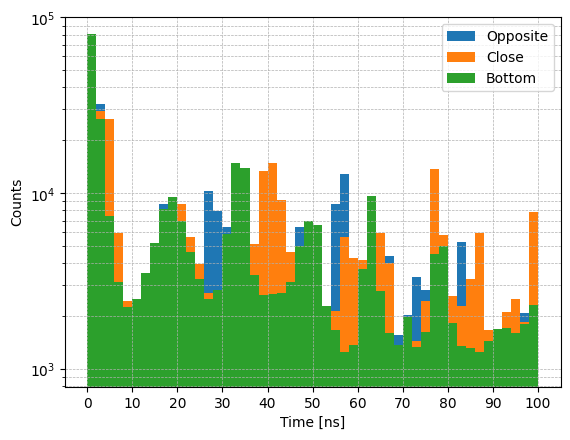

In [88]:
data_5=df.query("sub_type == 'QT2T' & sub_time < 1000 & sub_channel == 5")["sub_time"]
data_6=df.query("sub_type == 'QT2T' & sub_time < 1000 & sub_channel == 6")["sub_time"]
data_7=df.query("sub_type == 'QT2T' & sub_time < 1000 & sub_channel == 7")["sub_time"]

fct.hist_sub_time(data_list=[data_5, data_6, data_7],label_list=["Opposite","Close","Bottom"])

In [89]:
df_first = df.query("sub_num == 1")

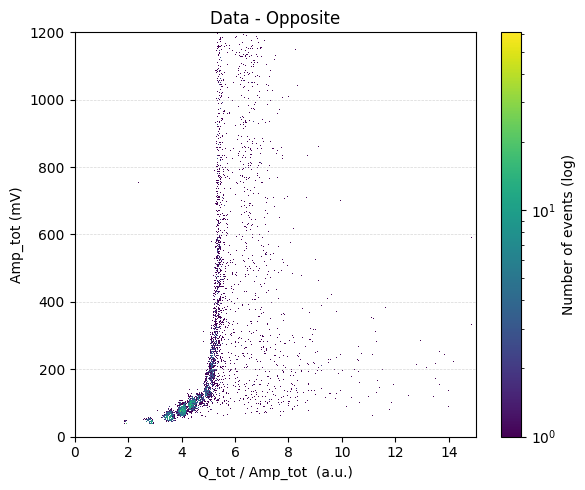

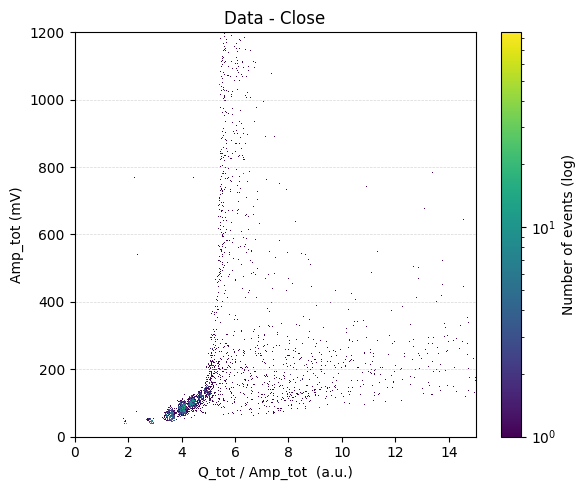

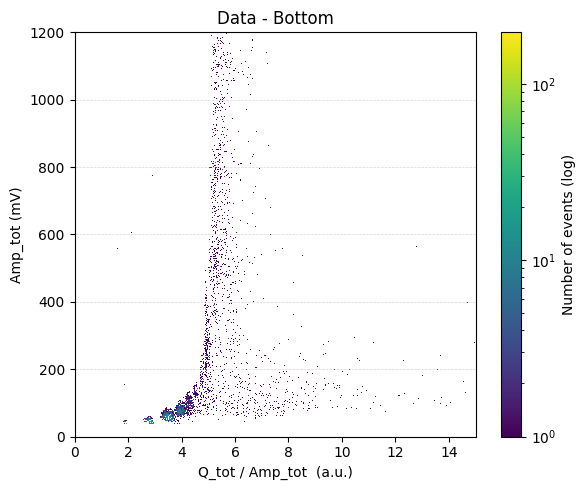

In [90]:
def plot_amp_ratio_hist2D(df, label="Data", channels=[5, 6, 7], bins=1000,
                                      xlim=(0, 15), ylim=(0, 1200), save_dir=None, filename=None):
    """
    Pour chaque canal, affiche une figure contenant un histogramme 2D :
    X : ratio (q / max_amp) (en ADC)
    Y : max_amp (en mV)
    
    Avec :
    - Colorbar propre à chaque figure
    - Axes X/Y personnalisables
    """

    PMs = ["Opposite", "Close", "Bottom"]
 
    for i, ch in enumerate(channels):
        df_ch = df.query("sub_channel == @ch")
        x = df_ch["sub_Q"] / df_ch["sub_max_amp"]
        y = df_ch["sub_max_amp"]

        fig, ax = plt.subplots(figsize=(6, 5))

        h = ax.hist2d(x, y, bins=bins, range=[[xlim[0], xlim[1]], [ylim[0], ylim[1]]], cmap="viridis", norm=mcolors.LogNorm(vmin=1))
        if ch != "sum":
            ax.set_title(f"{label} - {PMs[i]}")
        else :
            ax.set_title(f"{label} - Sum")
        ax.set_xlabel("Q_tot / Amp_tot  (a.u.)")
        ax.set_ylabel("Amp_tot (mV)")
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.grid(True, which="both", axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

        cbar = fig.colorbar(h[3], ax=ax, label="Number of events (log)")

        plt.tight_layout()
        # Sauvegarde avec suffixe spécifique au canal
        if save_dir and filename:
            os.makedirs(save_dir, exist_ok=True)
            suffix = f"_PM{ch}" if ch != "sum" else "_sum"
            full_path = os.path.join(save_dir, f"{filename}{suffix}.png")
            fig.savefig(full_path, dpi=300)

plot_amp_ratio_hist2D(df_first)

plt.show()

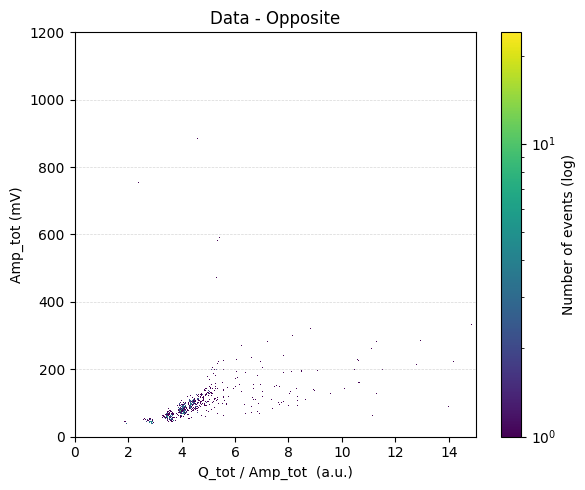

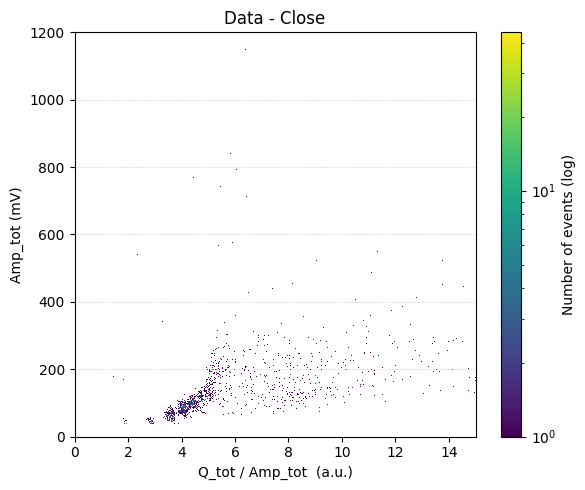

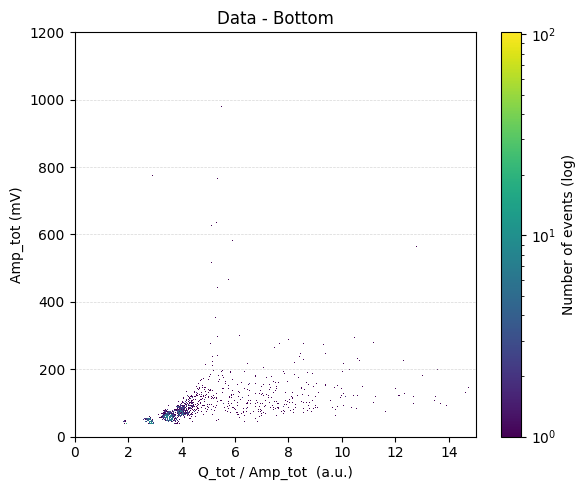

In [91]:
plot_amp_ratio_hist2D(df_extrem_sub_time)
plt.show()

In [92]:
df_coi = df.groupby("group_data_nb")["sub_type"]
df_coi.head()

0         QT2T
1         QT2T
2         QT2T
3         QT2T
4         QT2T
          ... 
966269    QT2T
966270    QT2T
966271    QT2T
966272    QT2T
966273    QT2T
Name: sub_type, Length: 807439, dtype: awkward